In [1]:
from Agent import *
from Landscape import *
from Cell import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Rule 1, 2 comparision on the same map; reset target each iter**

trials 0.0 percent complete
trials 10.0 percent complete
trials 20.0 percent complete
trials 30.0 percent complete
trials 40.0 percent complete
trials 50.0 percent complete
trials 60.0 percent complete
trials 70.0 percent complete
trials 80.0 percent complete
trials 90.0 percent complete


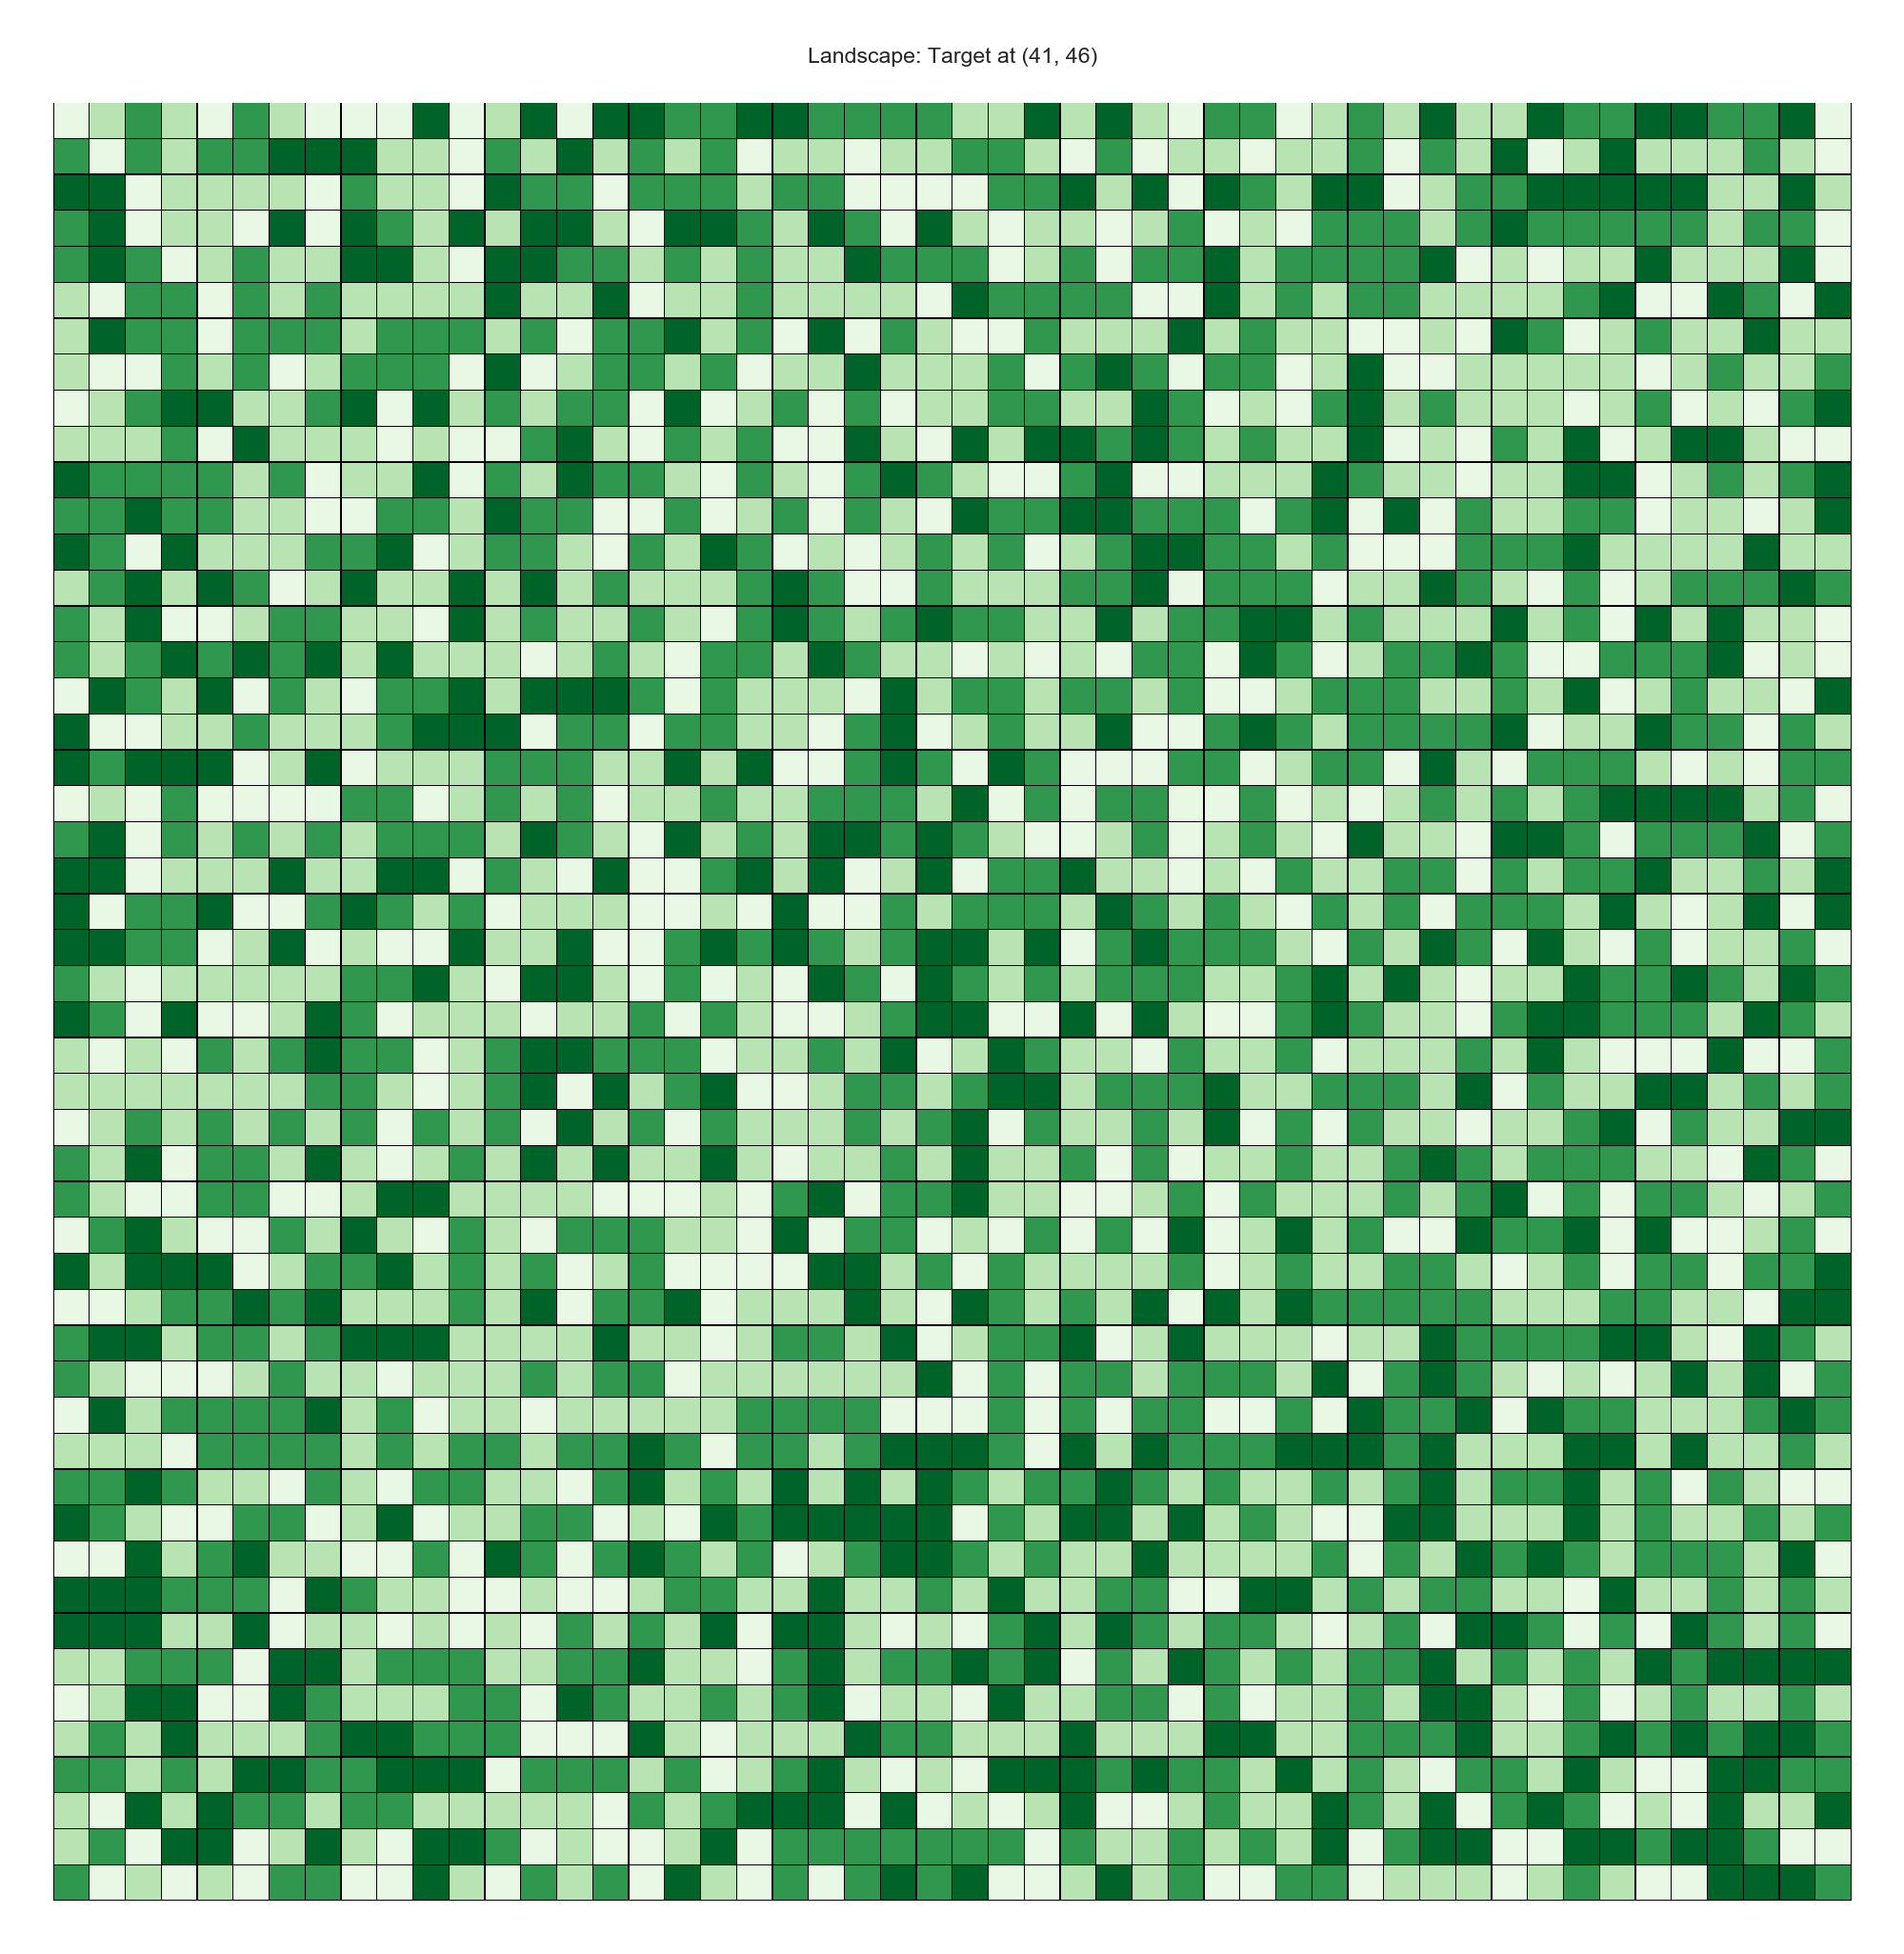

In [20]:
num_trials = 200
dim = 50

test_landscape = landscape(dim)
test_landscape.saveLandscape('ruleOneTwoComparison')

num_searches = []

for n in range(num_trials):
    
    test_agent1 = agent(test_landscape, 1)
    test_agent2 = agent(test_landscape, 2)

    target1 = test_agent1.findTarget()
    #test_agent1.saveBelief('ruleOneTwoComparison_agentOneFinal')
    #print('Rule 1 agent found target at {} with {} actions'.format(target1, test_agent1.num_actions))

    target2 = test_agent2.findTarget()
    #test_agent2.saveBelief('ruleOneTwoComparison_agentTwoFinal')
    #print('Rule 2 agent found target at {} with {} actions'.format(target1, test_agent2.num_actions))
    
    num_searches.append([test_agent1.num_actions, test_agent2.num_actions])
    
    test_landscape.resetTarget()
    #print('new target at ({}, {})'.format(test_landscape.target_x, test_landscape.target_y))
    
    if n % (num_trials/10) == 0:
        print('trials', round(((n/num_trials)*100), 2), 'percent complete')
    
    #print('\n\n')

In [21]:
fixedMapComparisonDF = pd.DataFrame(num_searches)
fixedMapComparisonDF.columns = ['RuleOne', 'RuleTwo']
fixedMapComparisonDF['diff'] = fixedMapComparisonDF['RuleOne'] - fixedMapComparisonDF['RuleTwo']

In [23]:
fixedMapComparisonDF['diff'].describe()

count      200.000000
mean       426.550000
std       8418.856089
min     -49320.000000
25%       -890.500000
50%        739.000000
75%       2578.500000
max      30422.000000
Name: diff, dtype: float64

In [30]:
pd.DataFrame(fixedMapComparisonDF['diff'].describe()).transpose().to_csv('./data/fixedmap_1varstats.csv')

In [24]:
fixedMapComparisonDF.to_csv('./data/fixed_map_comparison_ruleOneTwo.csv')

In [22]:
fixedMapComparisonDF = pd.read_csv('./data/fixed_map_comparison_ruleOneTwo.csv')

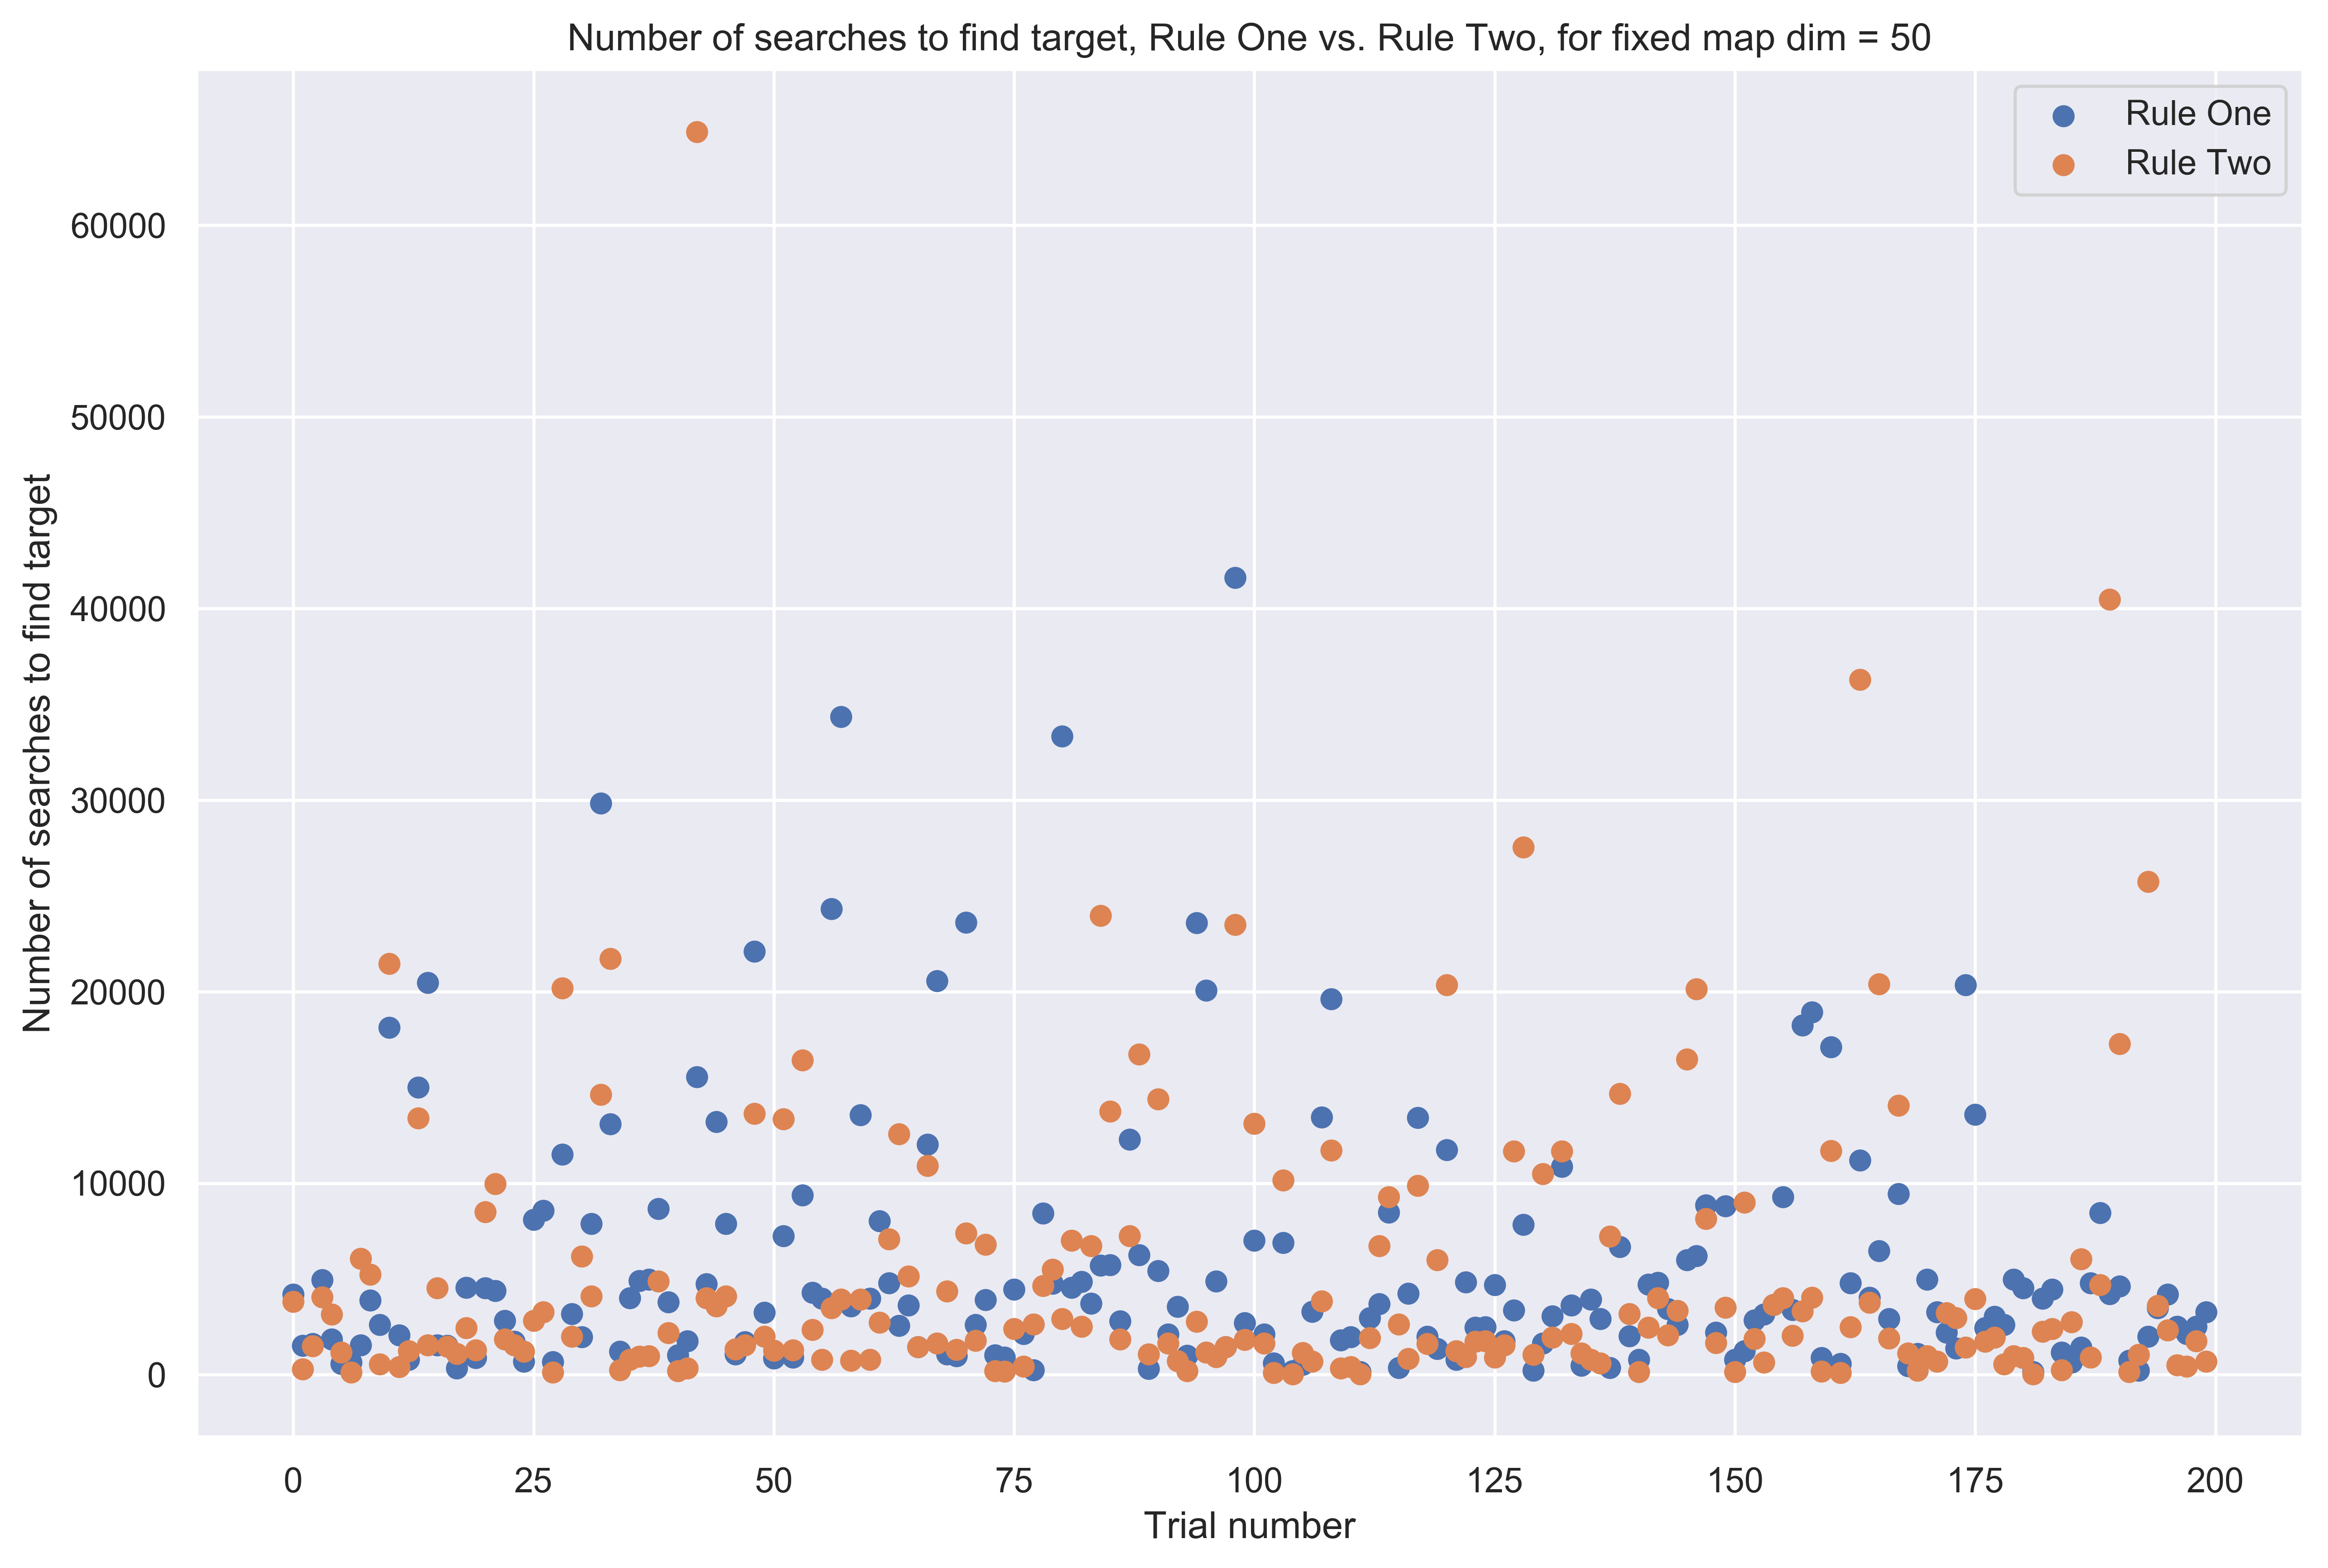

In [36]:
plt.figure(figsize=(12,8), dpi=500)
plt.scatter(fixedMapComparisonDF.index, fixedMapComparisonDF['RuleOne'])
plt.scatter(fixedMapComparisonDF.index, fixedMapComparisonDF['RuleTwo'])
plt.xlabel('Trial number')
plt.ylabel('Number of searches to find target')
plt.legend(['Rule One', 'Rule Two'])
plt.title('Number of searches to find target, Rule One vs. Rule Two, for fixed map dim = 50')
plt.savefig('./imgs/fixed_map_comparison_ruleOneTwoScatter.png')

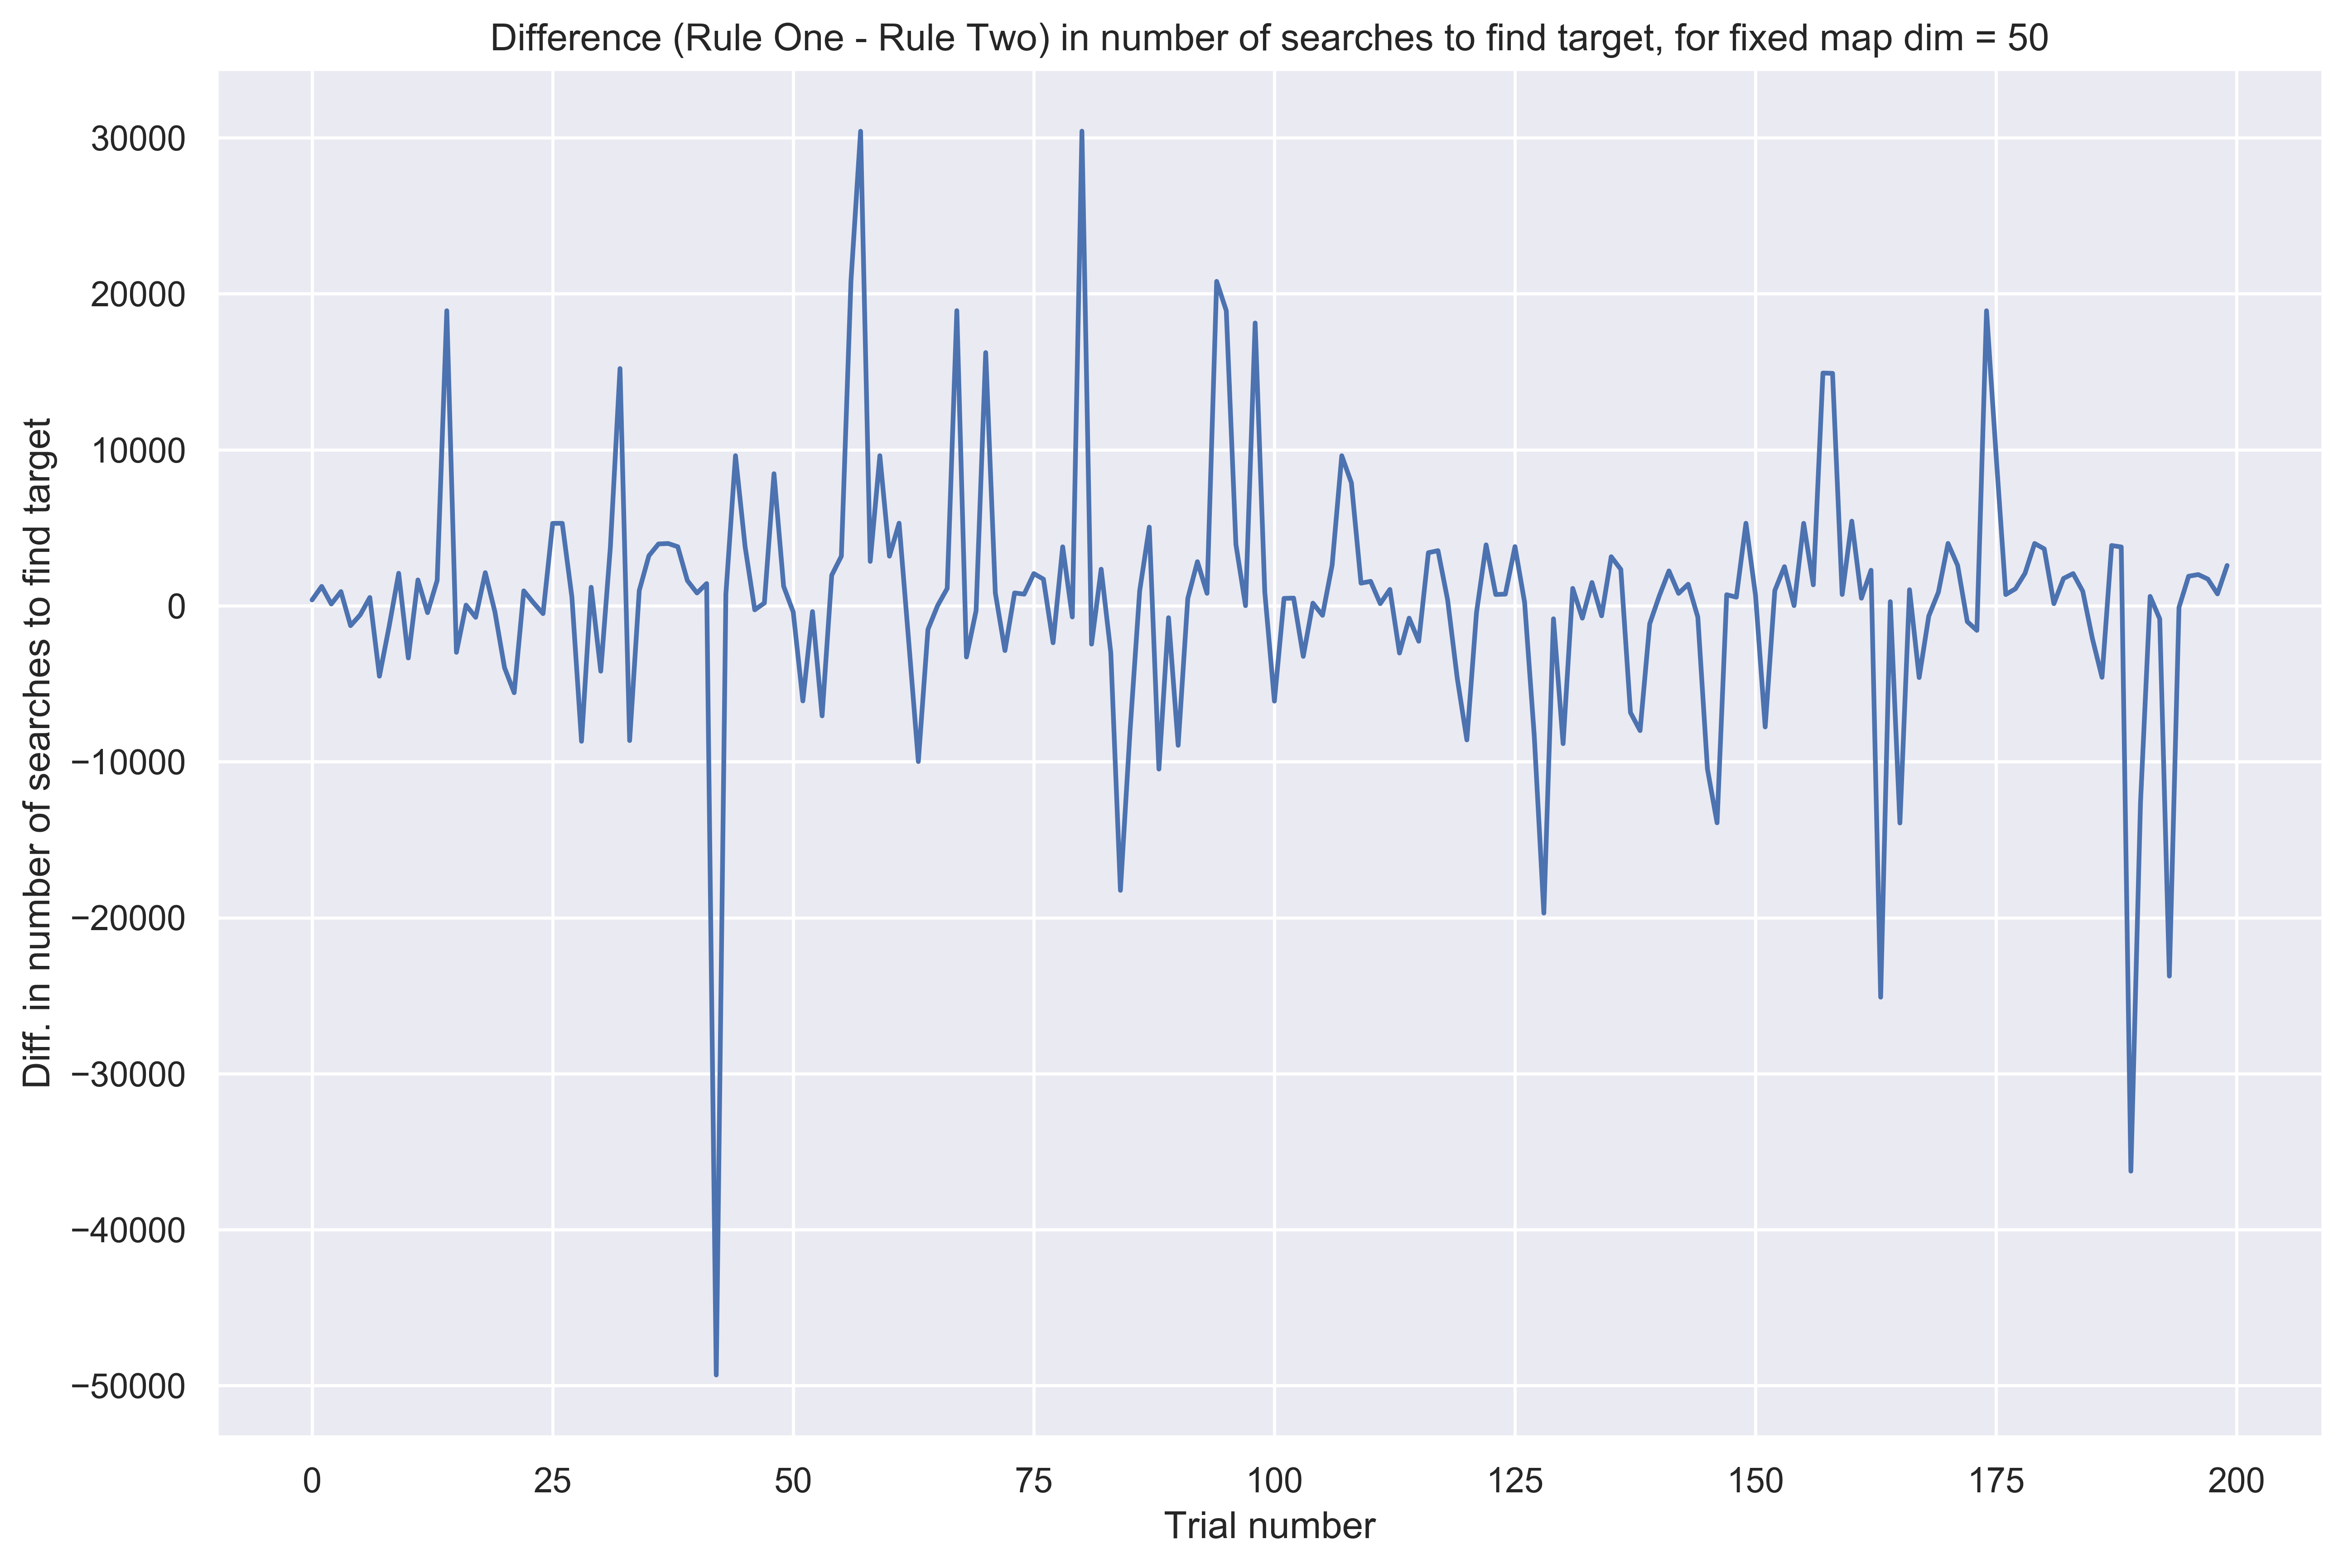

In [23]:
plt.figure(figsize=(12,8), dpi=500)
plt.plot(fixedMapComparisonDF.index, fixedMapComparisonDF['diff'])
plt.xlabel('Trial number')
plt.ylabel('Diff. in number of searches to find target')
plt.title('Difference (Rule One - Rule Two) in number of searches to find target, for fixed map dim = 50')
plt.savefig('./imgs/fixed_map_comparison_ruleOneTwoDiff.png')

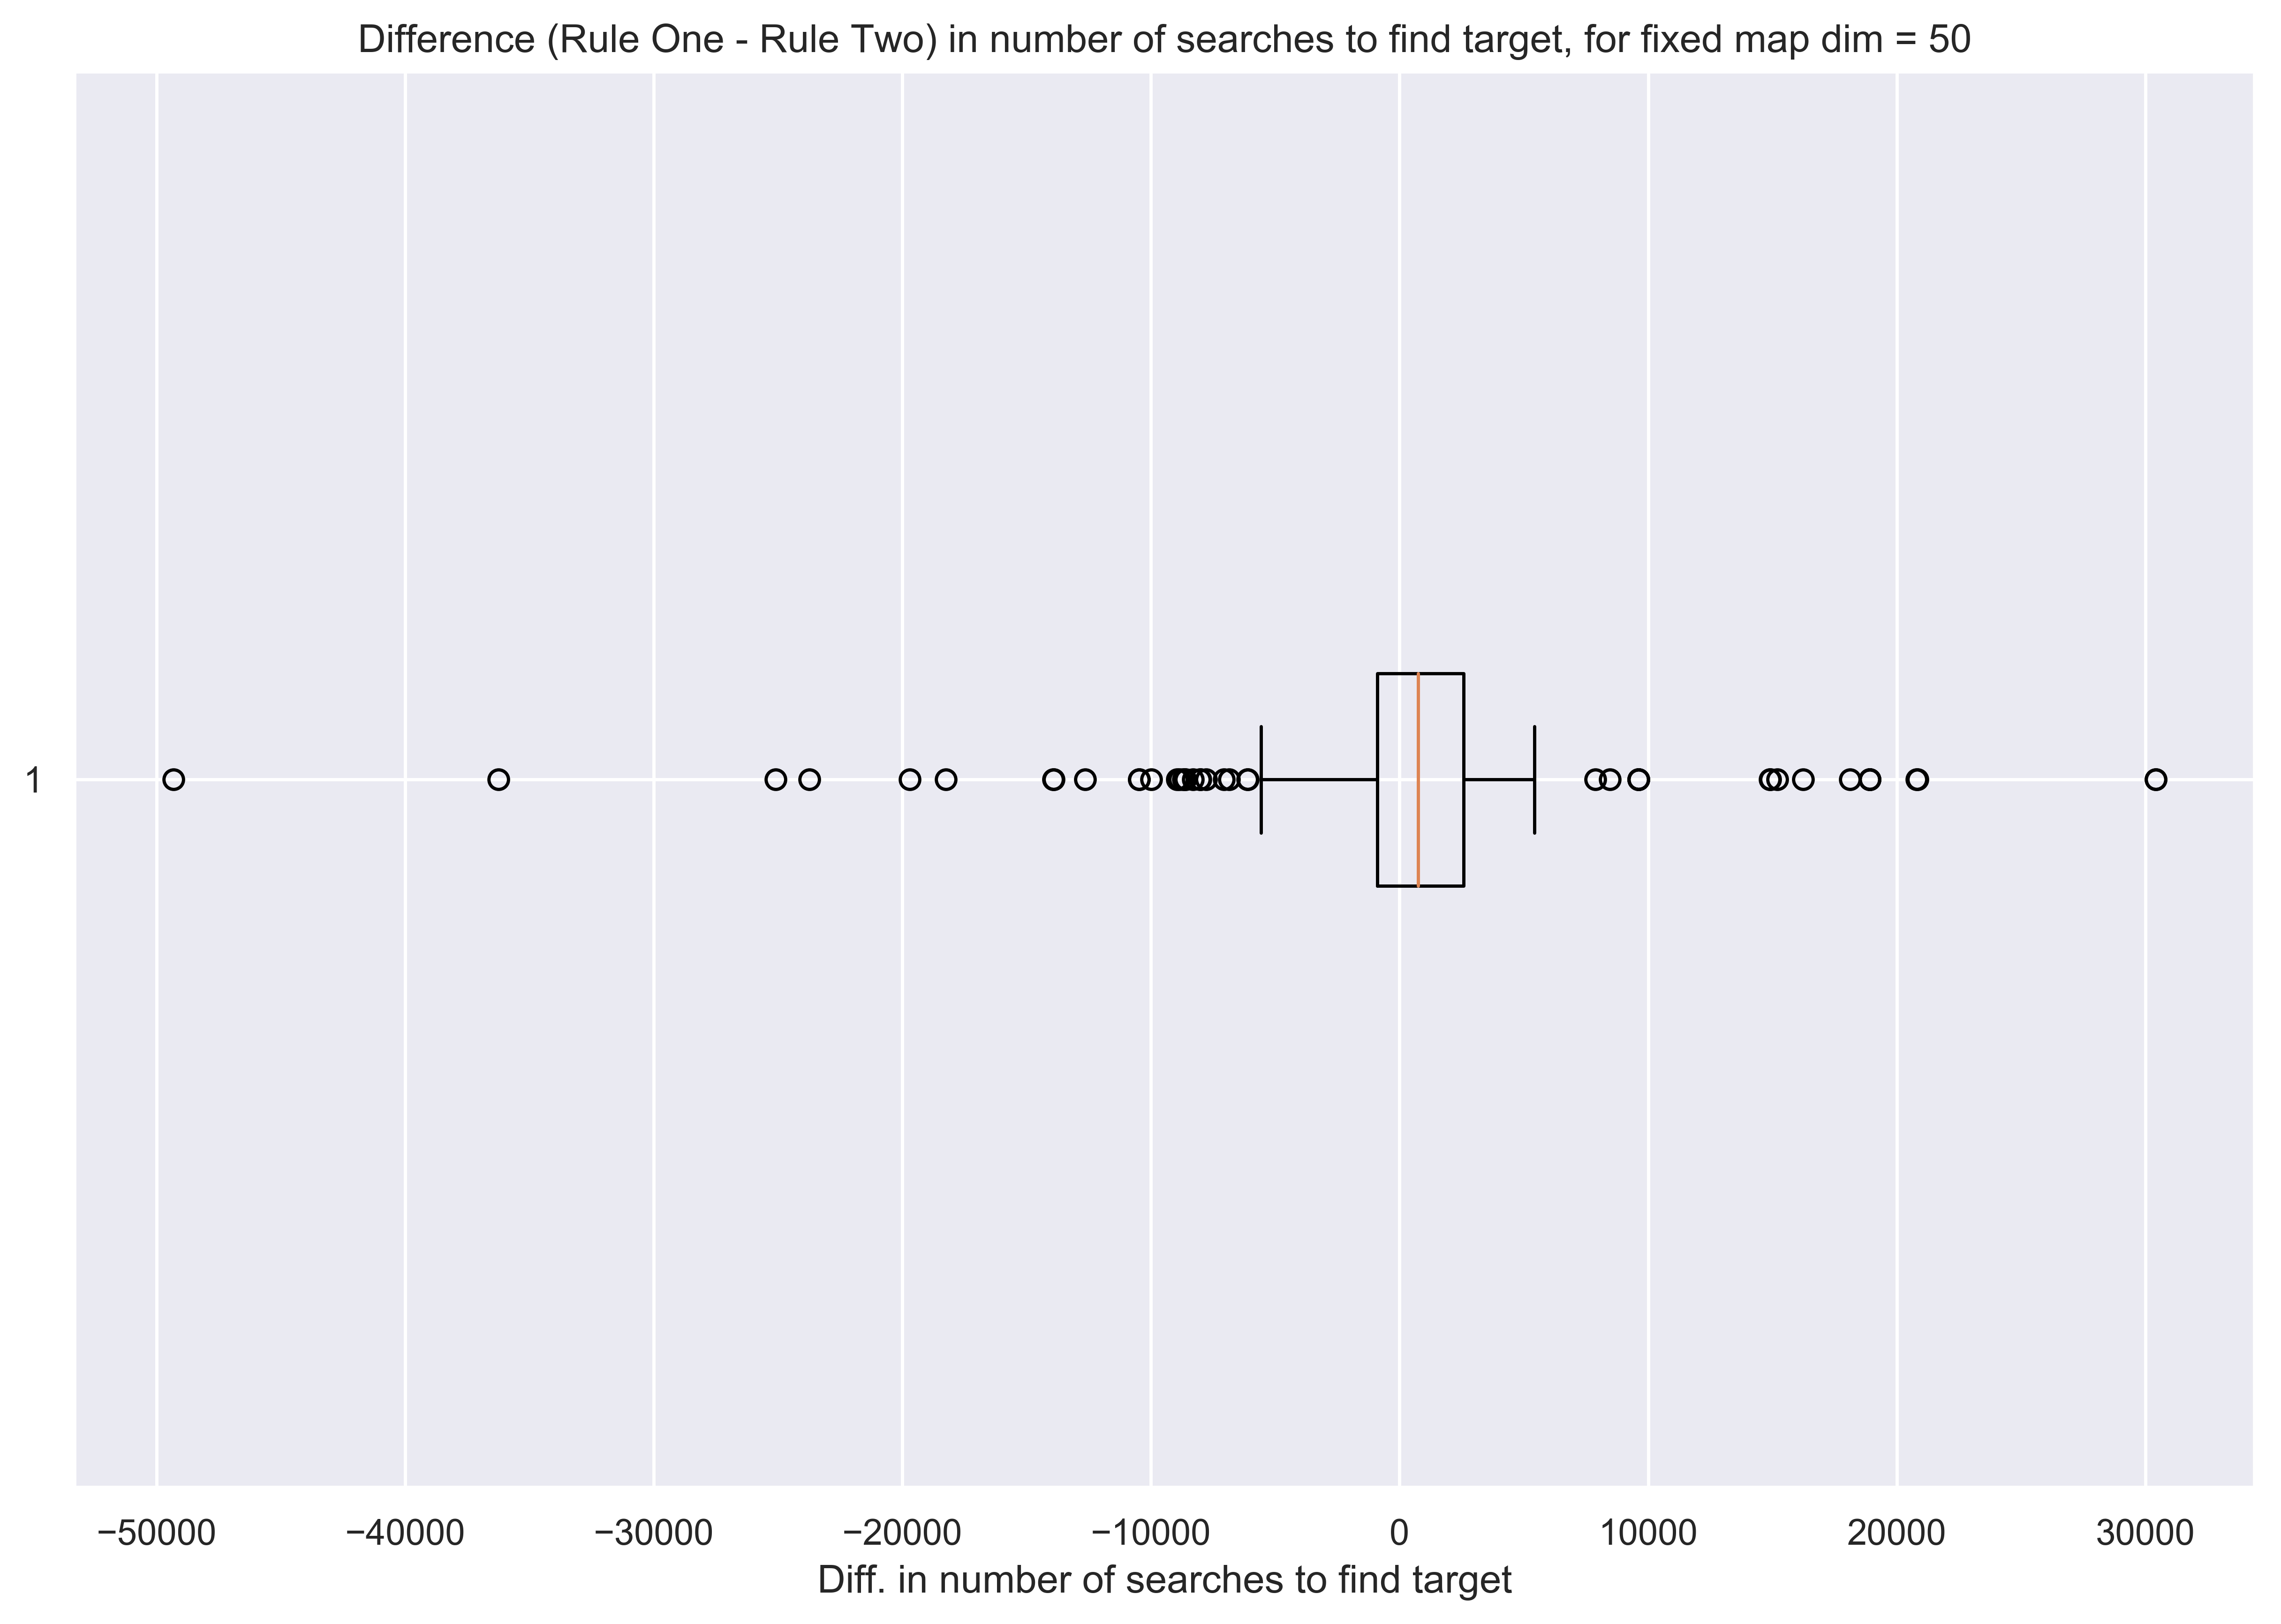

In [24]:
plt.figure(figsize=(12,8), dpi=500)
plt.boxplot(fixedMapComparisonDF['diff'], vert=False)
plt.xlabel('Diff. in number of searches to find target')
plt.title('Difference (Rule One - Rule Two) in number of searches to find target, for fixed map dim = 50')
plt.savefig('./imgs/fixed_map_comparison_ruleOneTwoDiffBox.png')

**Rule 1, 2 comparision on the multiple maps; reset target each iter**

In [6]:
num_maps = 50
num_trials = 30
dim = 50

num_searches = []

for m in range(num_maps):
    test_landscape = landscape(dim)
    
    ag1_agg = 0
    ag2_agg = 0
    
    for n in range(num_trials):  
        
        test_agent1 = agent(test_landscape, 1)
        test_agent2 = agent(test_landscape, 2)
        
        
        target1 = test_agent1.findTarget()
        target2 = test_agent2.findTarget()

        ag1_agg += test_agent1.num_actions
        ag2_agg += test_agent2.num_actions
        
        test_landscape.resetTarget()
        
        '''
        if n % (num_trials/10) == 0:
            print('\ttrials', round(((n/num_trials)*100), 2), 'percent complete')
        '''
        
    num_searches.append([(ag1_agg/num_trials), (ag2_agg/num_trials)])

    if m % (num_maps/5) == 0:
        print('maps', round((m/num_maps)*100, 2), 'percent done')

maps 0.0 percent done
maps 20.0 percent done
maps 40.0 percent done
maps 60.0 percent done
maps 80.0 percent done


In [8]:
multimap_df = pd.DataFrame(num_searches)

In [10]:
multimap_df.columns=['RuleOne', 'RuleTwo']

In [11]:
multimap_df['diff'] = multimap_df['RuleOne'] - multimap_df['RuleTwo']

In [13]:
multimap_df.to_csv('./data/multimap_comparison_ruleOneTwo.csv')

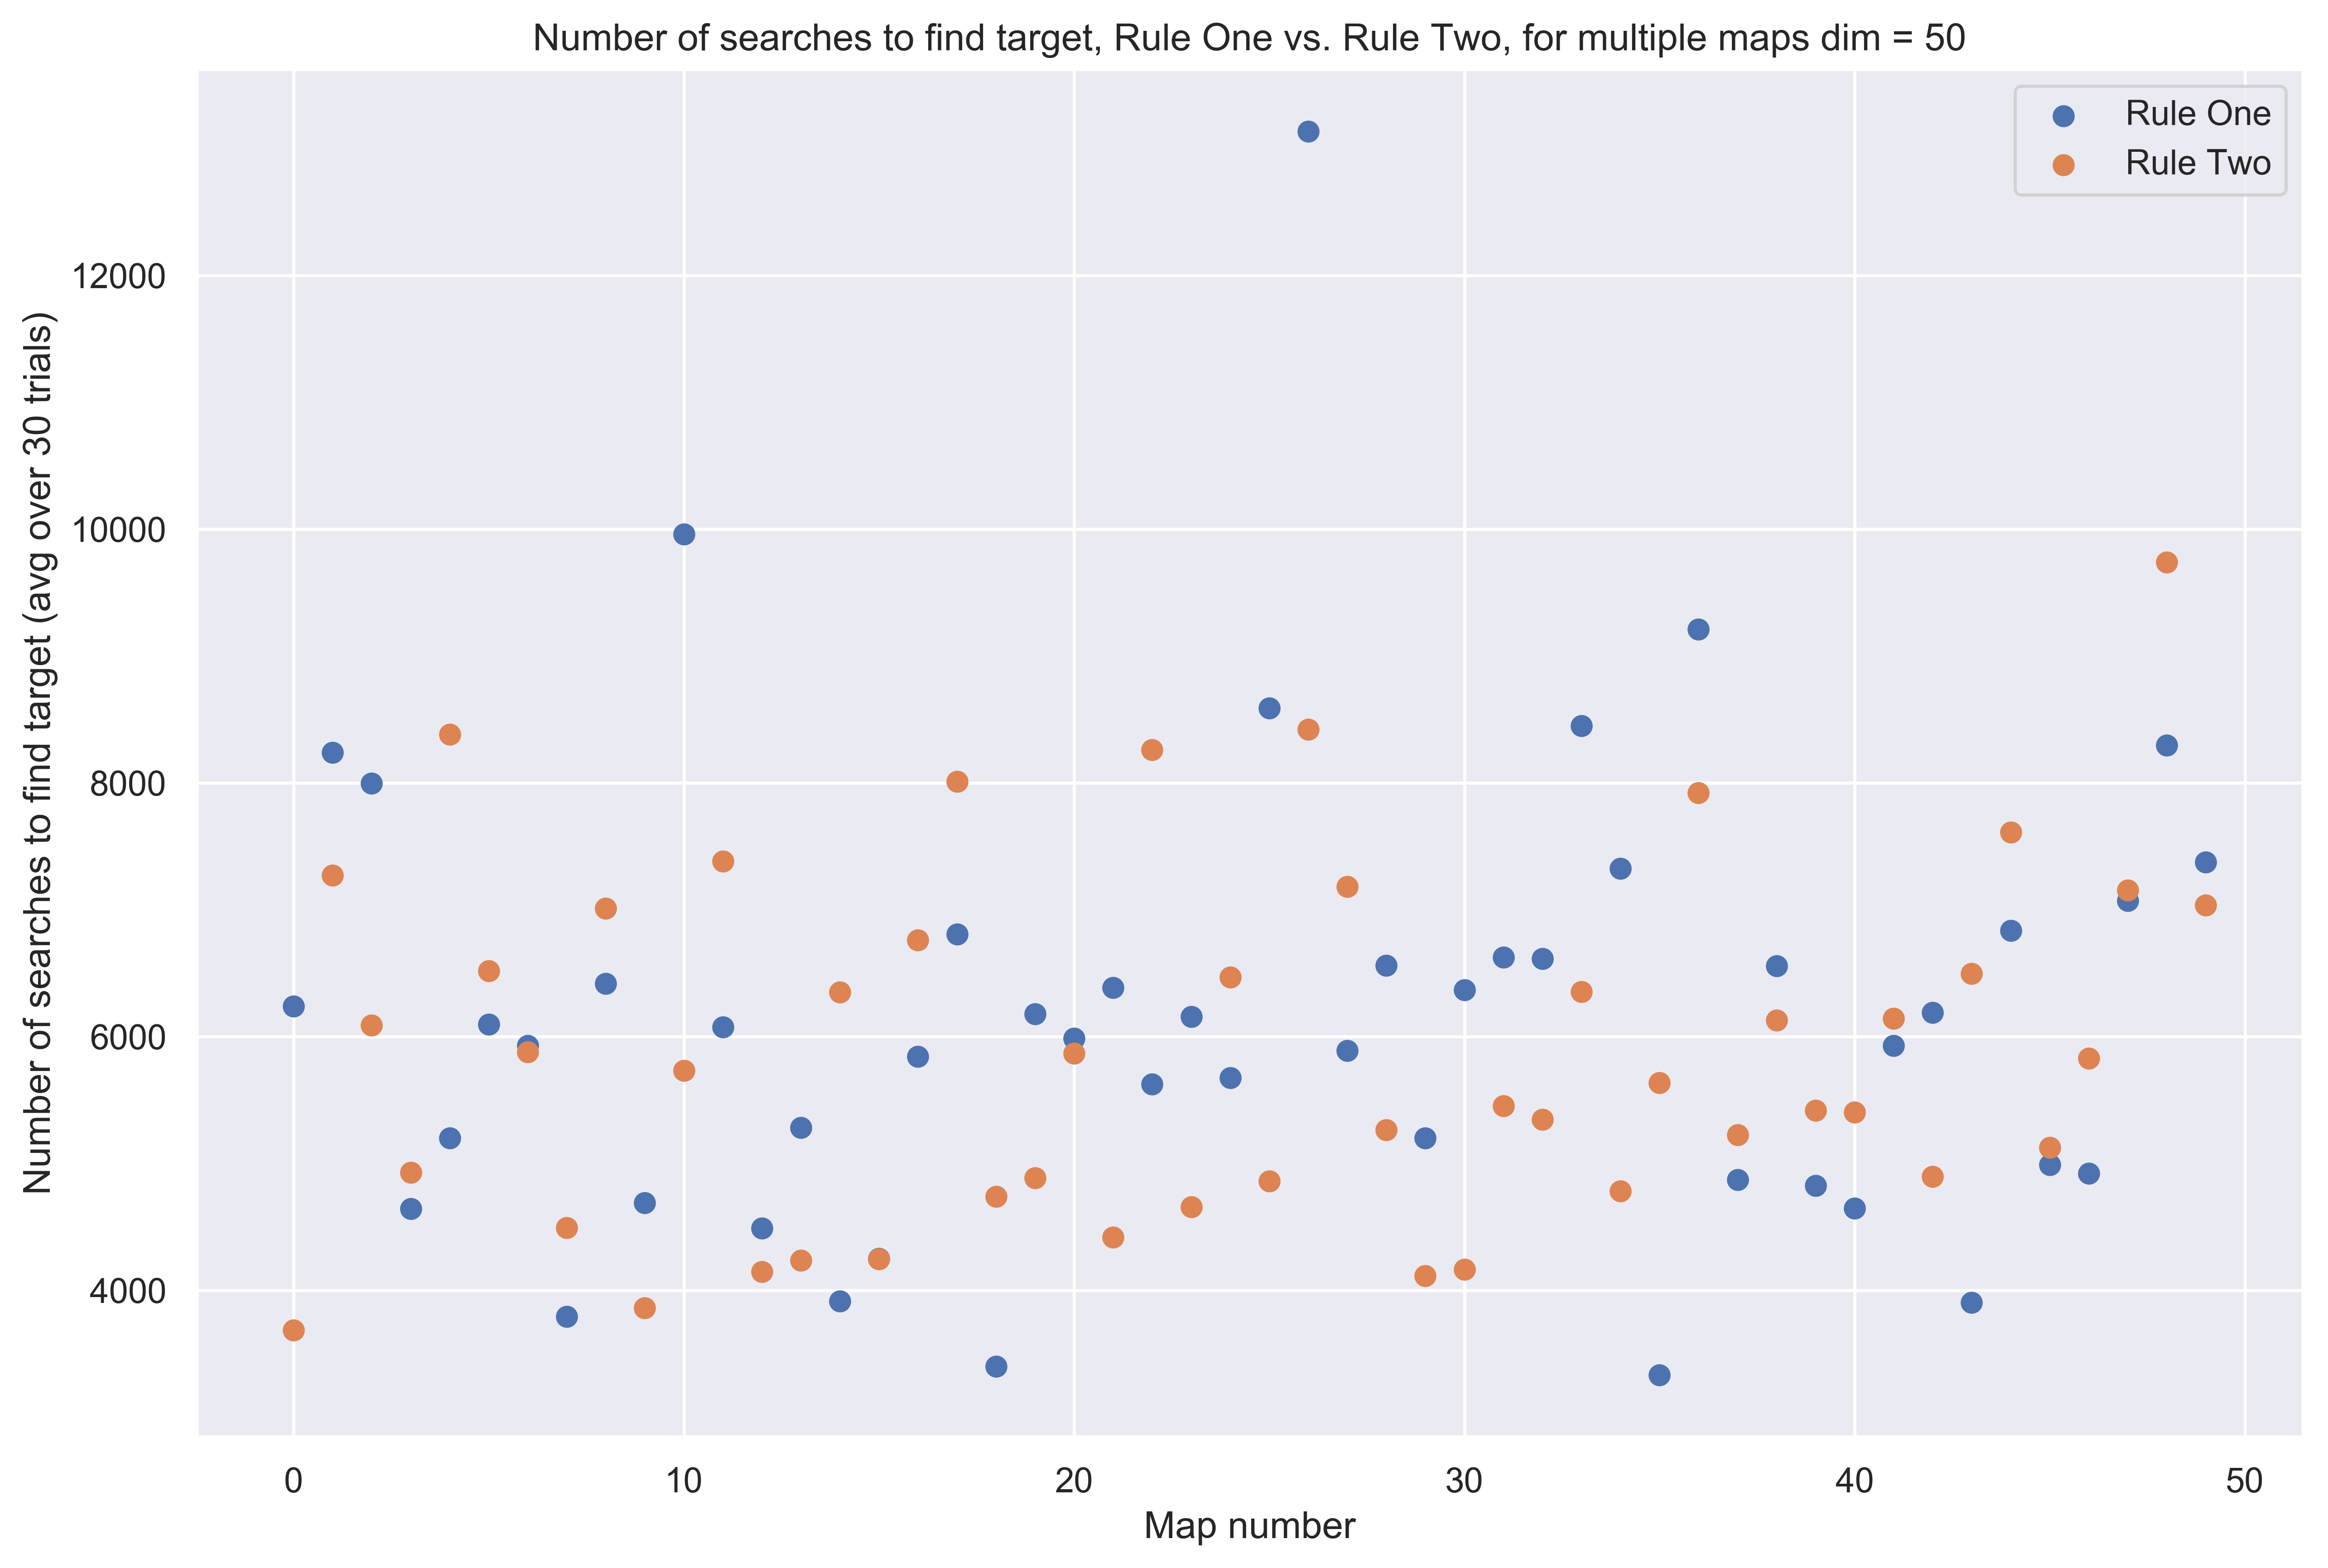

In [16]:
plt.figure(figsize=(12,8), dpi=500)
plt.scatter(multimap_df.index, multimap_df['RuleOne'])
plt.scatter(multimap_df.index, multimap_df['RuleTwo'])
plt.legend(['Rule One', 'Rule Two'])
plt.xlabel('Map number')
plt.ylabel('Number of searches to find target (avg over 30 trials)')
plt.title('Number of searches to find target, Rule One vs. Rule Two, for multiple maps dim = 50')
plt.savefig('./imgs/multi_map_comparison_ruleOneTwoScatter.png')

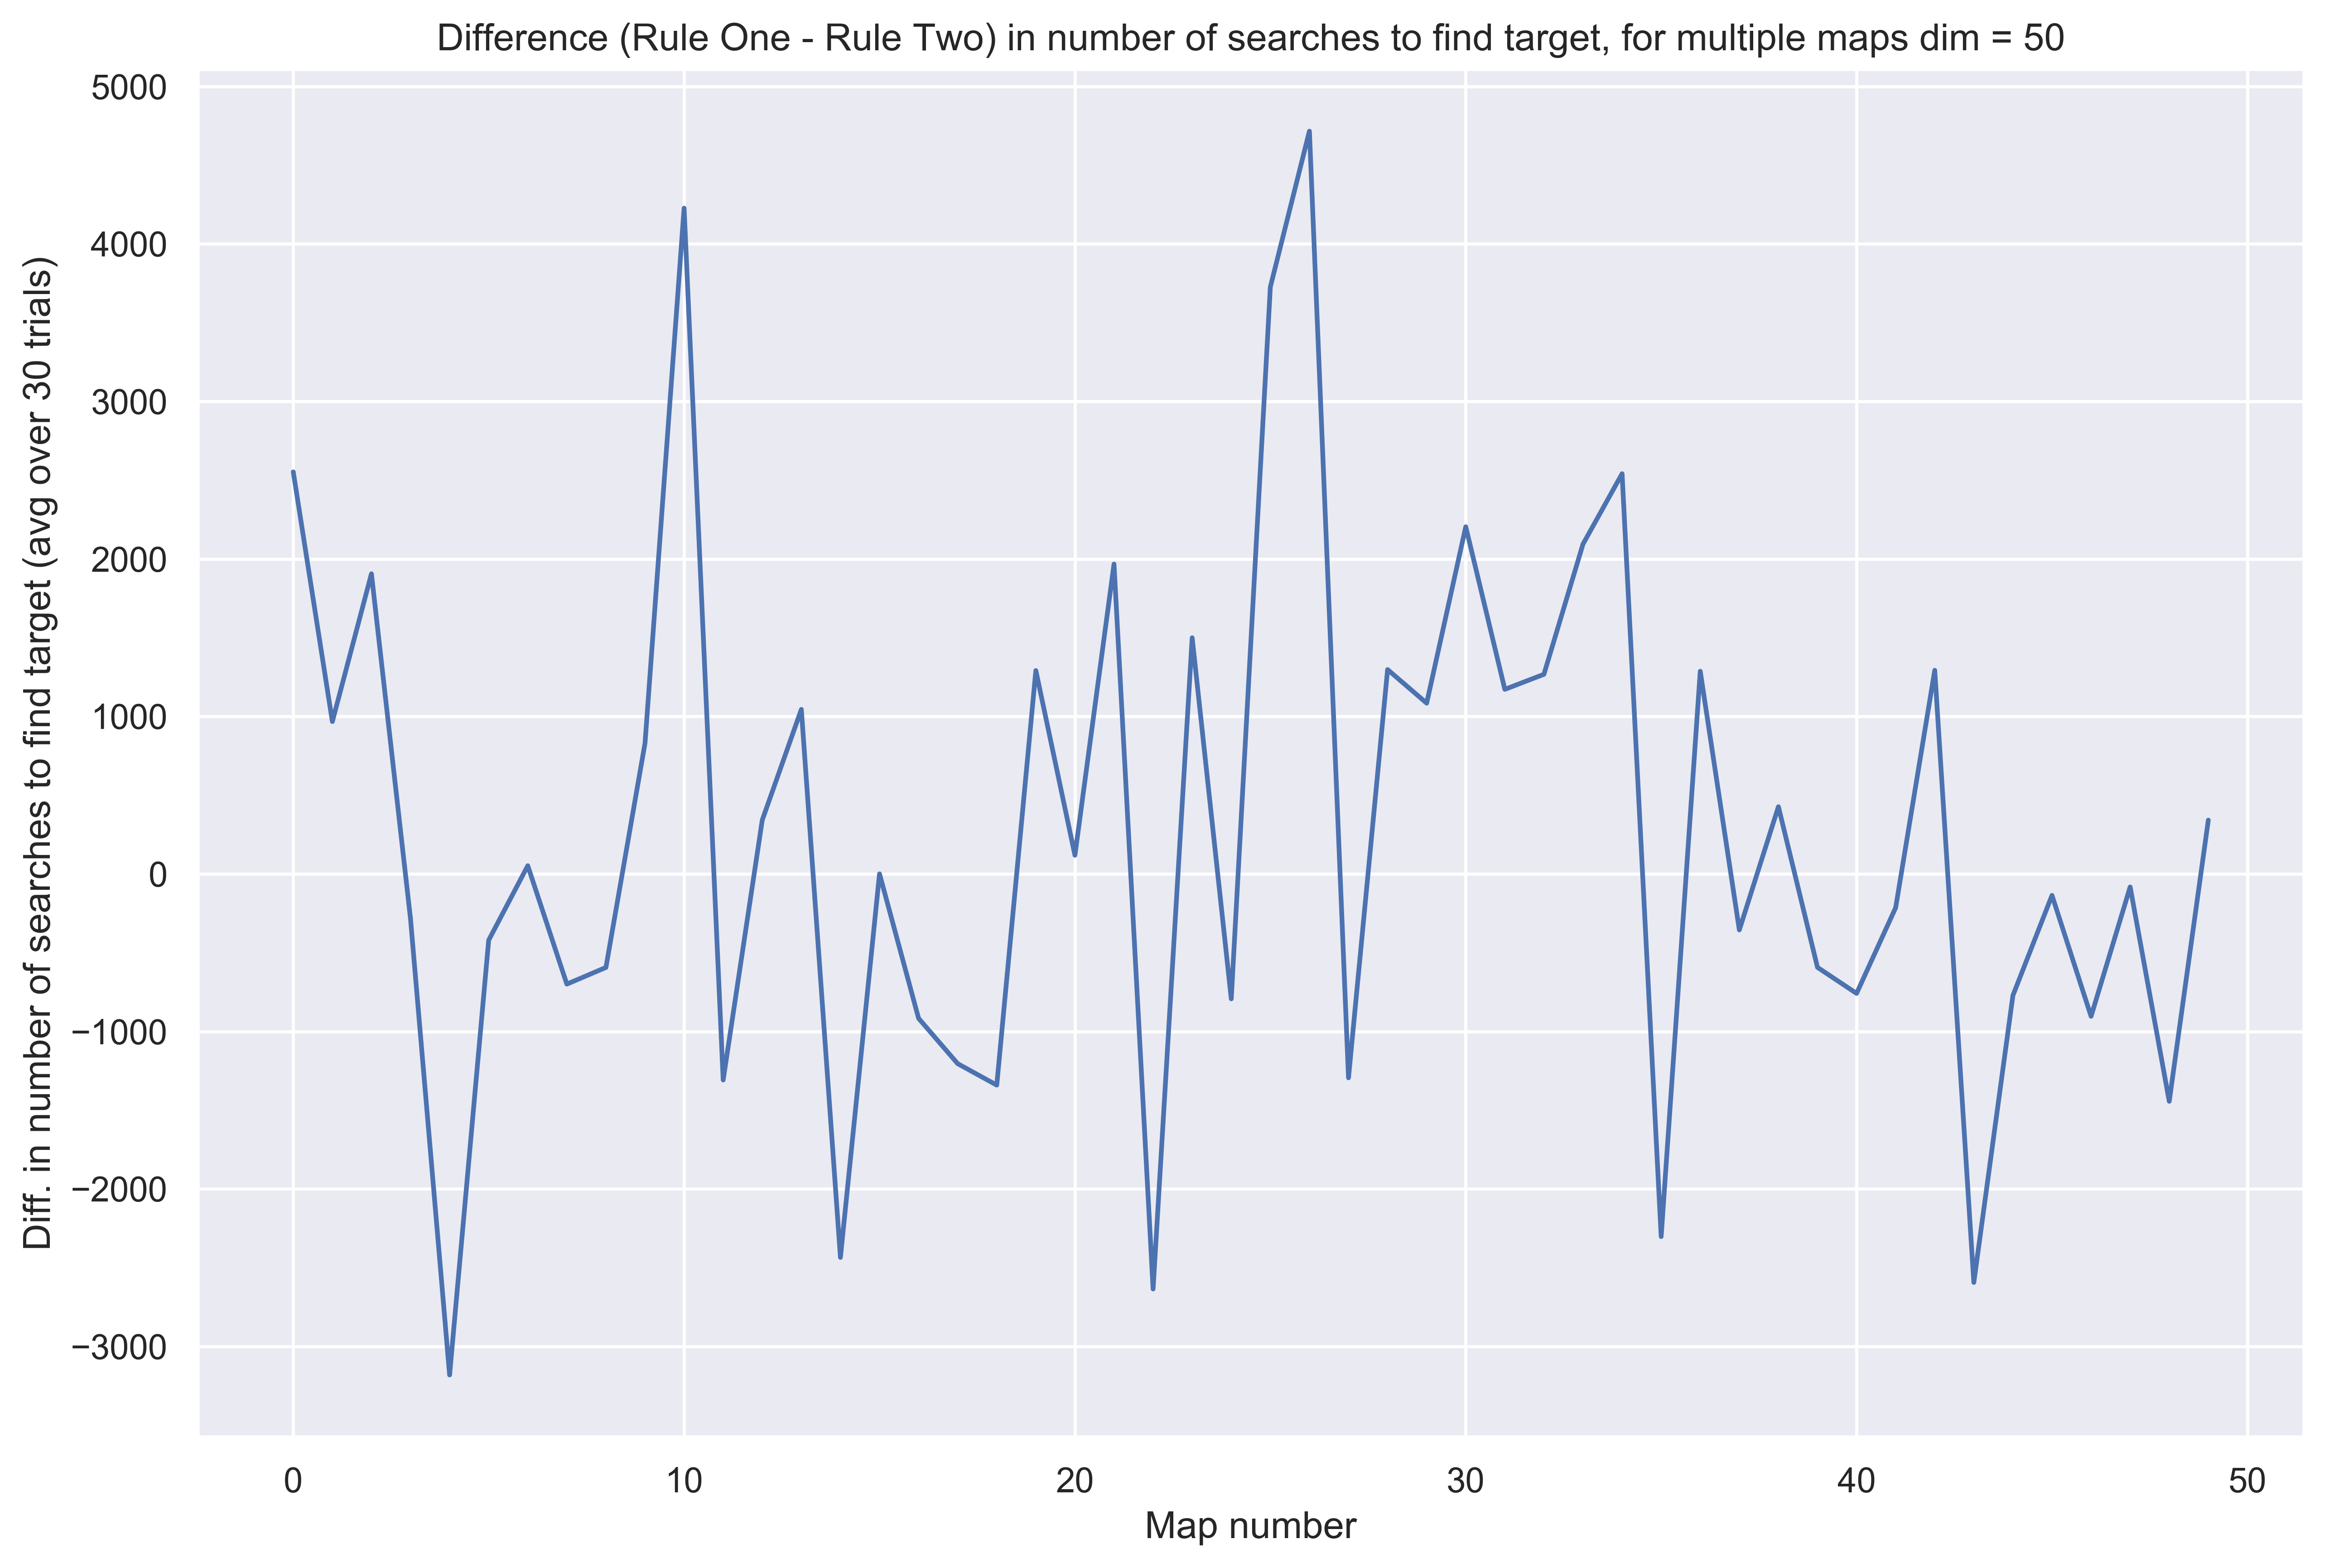

In [25]:
plt.figure(figsize=(12,8), dpi=500)
plt.plot(multimap_df.index, multimap_df['diff'])
plt.xlabel('Map number')
plt.ylabel('Diff. in number of searches to find target (avg over 30 trials)')
plt.title('Difference (Rule One - Rule Two) in number of searches to find target, for multiple maps dim = 50')
plt.savefig('./imgs/multi_map_comparison_ruleOneTwoDiff.png')

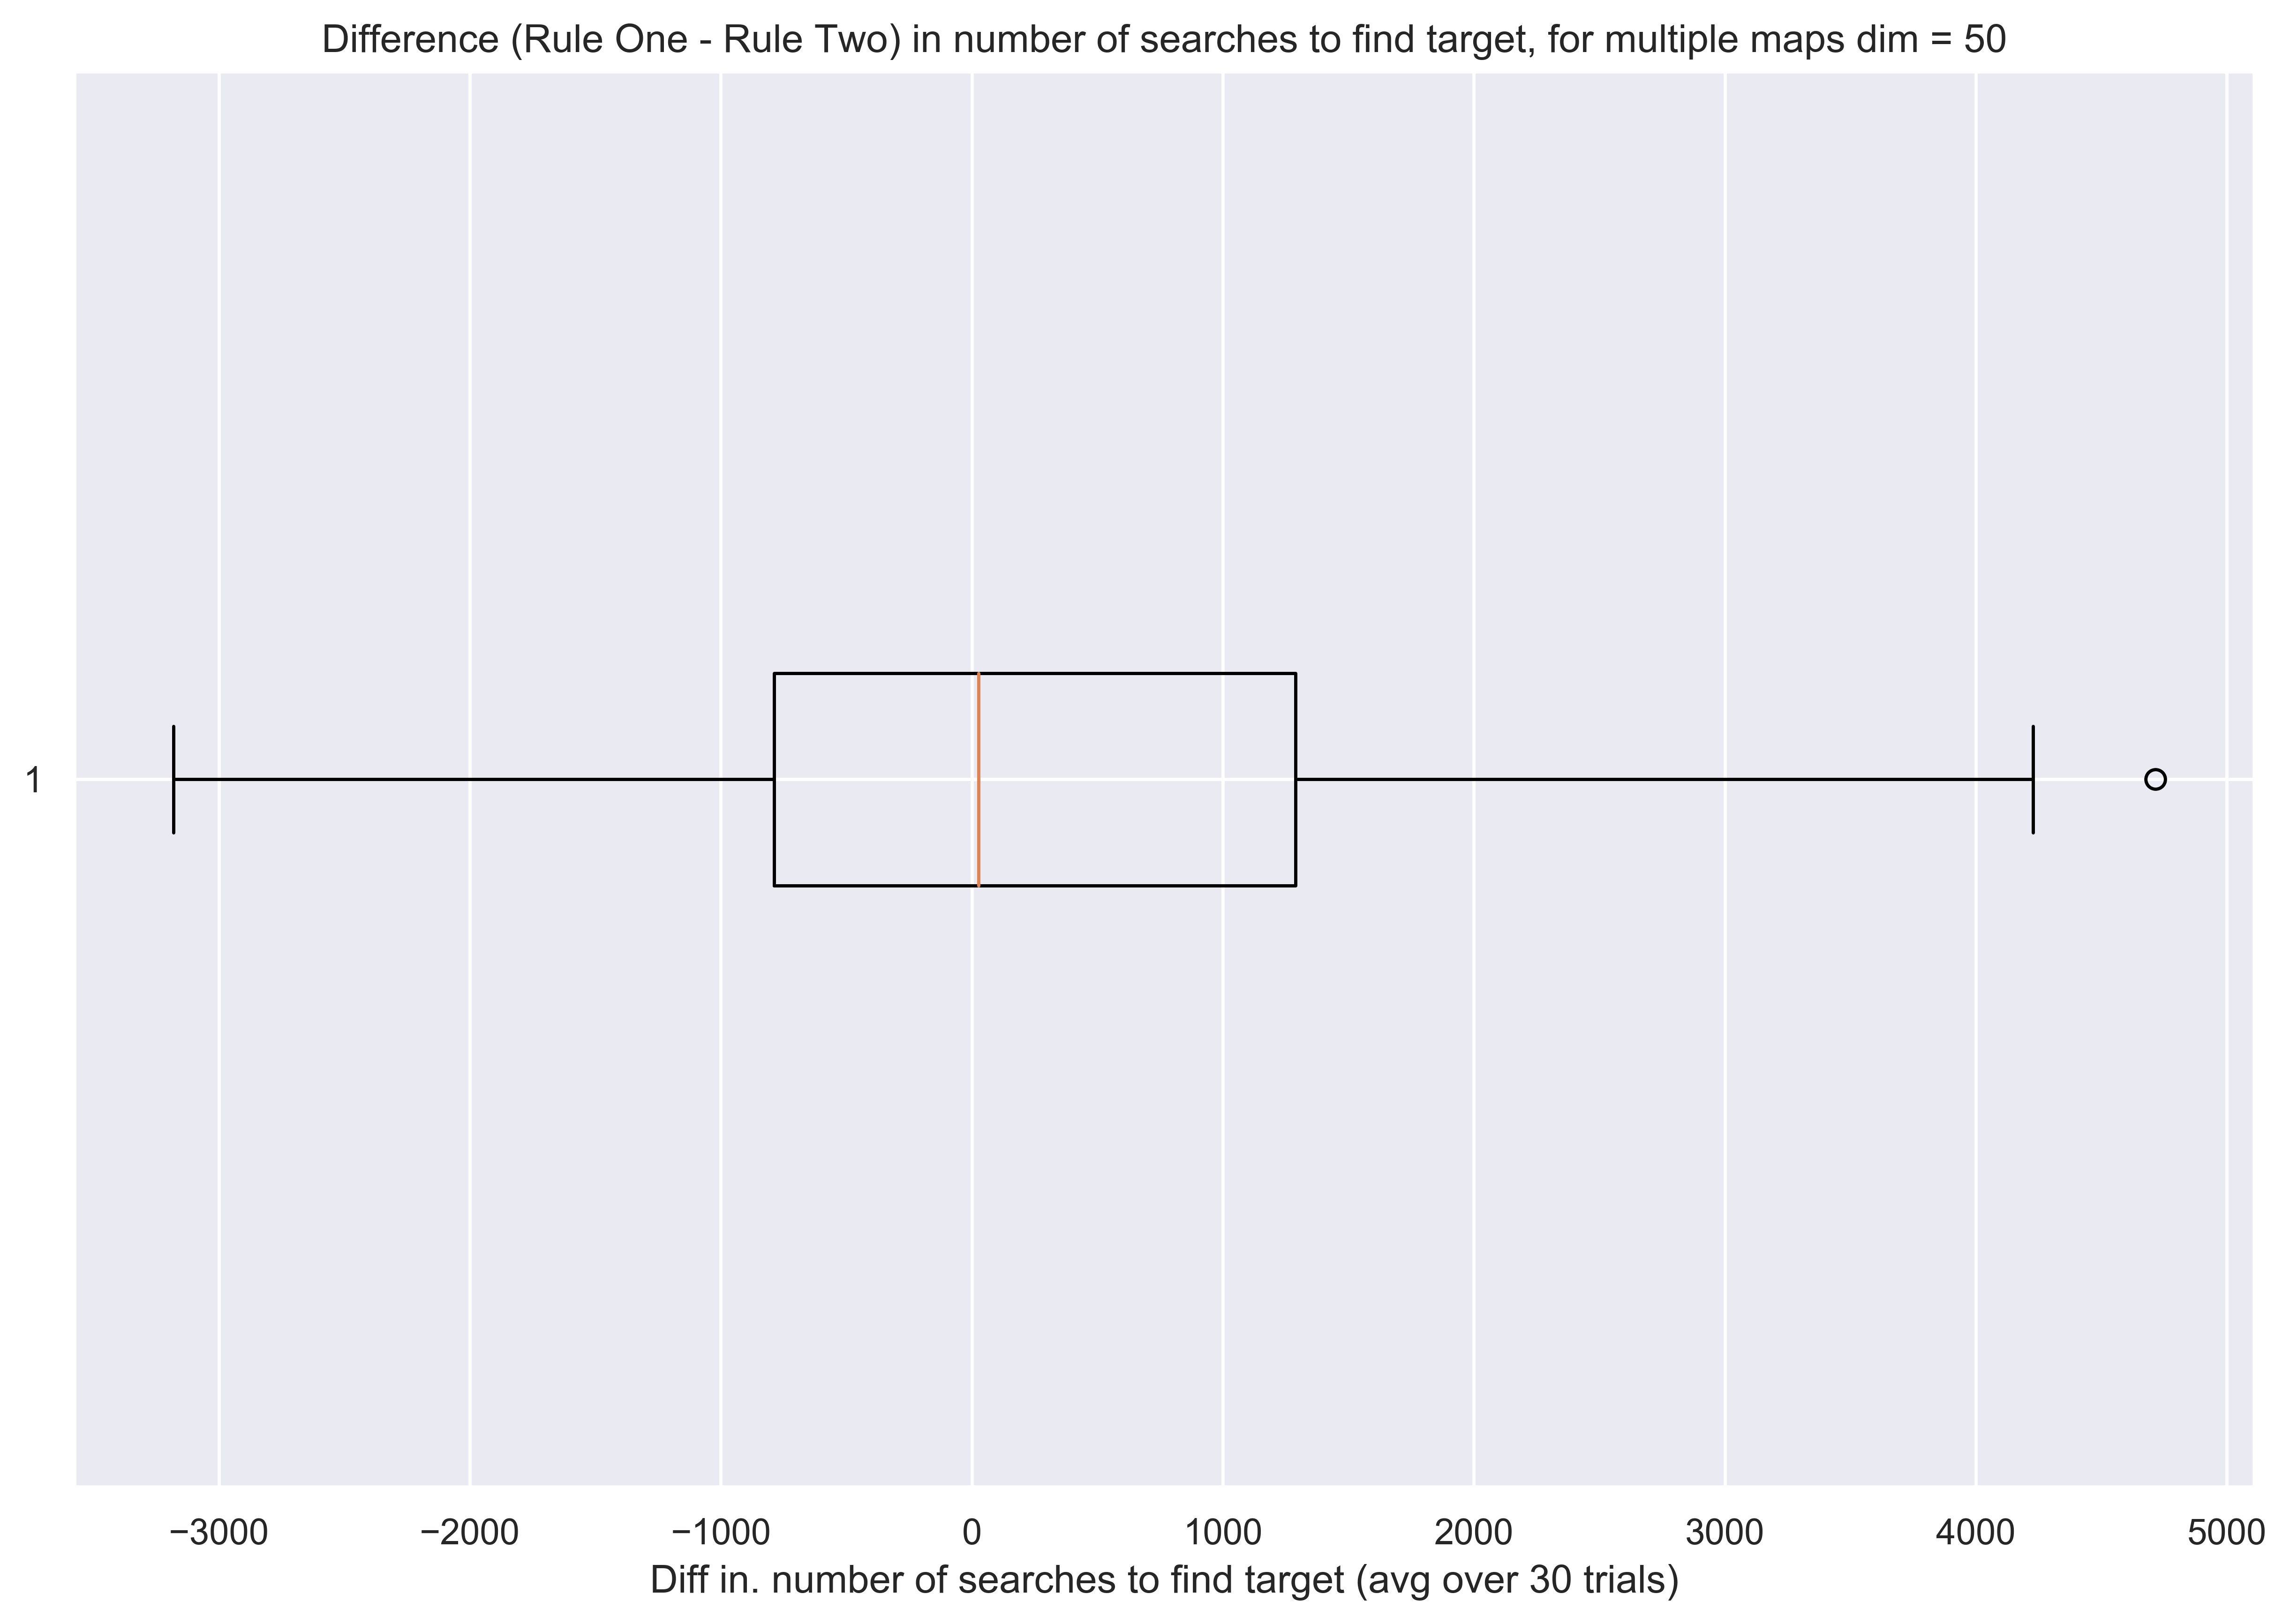

In [26]:
plt.figure(figsize=(12,8), dpi=500)
plt.boxplot(multimap_df['diff'], vert=False)
plt.xlabel('Diff in. number of searches to find target (avg over 30 trials)')
plt.title('Difference (Rule One - Rule Two) in number of searches to find target, for multiple maps dim = 50')
plt.savefig('./imgs/multi_map_comparison_ruleOneTwoDiffBox.png')

In [29]:
pd.DataFrame(multimap_df['diff'].describe()).transpose().to_csv('./data/multimap_1varstats.csv')